# Set up Notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
#Create a file path
path= r'C:\Users\Zinnia\Documents\Career Foundry Data Analytics Course\Achievement 6\Data\Edited'

In [3]:
#Import Data
df=pd.read_csv(os.path.join(path, 'County_Data_with_Coordinates.csv'), index_col=False)

In [4]:
#Prompt matplotlib visuals to appear in the notebook 

%matplotlib inline

In [5]:
df.shape

(21, 9)

In [6]:
df.head()

,County,Latitude,Longitude,Total_Acres_Open_Space,Total_Num_Lots,Acres_In_County,Percent_Open_Space,Population_in_2020,Percent_Open_Space_Per_Person
0,Atlantic,39.507885,-75.170510,390.772836,6701,430000,0.09%,264650,0.00
1,Bergen,40.947714,-74.364116,22144.340800,2316,157900,14.02%,931275,0.02
2,Burlington,39.861181,-75.286718,185462.562900,9457,525000,35.33%,446301,0.42
3,Camden,39.801846,-75.218956,29503.784660,1882,145500,20.28%,506721,0.06
4,Cape May,39.055172,-75.378565,67831.195620,8992,397000,17.09%,92701,0.73


In [7]:
#Import .json file for counties in NJ

county_geo= r'C:\Users\Zinnia\CountyData.json'

# Data Wrangling

#Confirmed that both are in Proper Case for the county name. All columns were set up for this analysis.

# Conduct Consistency Checks

In [8]:
#Check for missing values
df.isnull().sum()

County                           0
Latitude                         0
Longitude                        0
Total_Acres_Open_Space           0
Total_Num_Lots                   0
Acres_In_County                  0
Percent_Open_Space               0
Population_in_2020               0
Percent_Open_Space_Per_Person    0
dtype: int64

In [9]:
#Check for duplicates
dups = df.duplicated()

In [10]:
dups.shape

(21,)

#No duplicates

<AxesSubplot:xlabel='Total_Acres_Open_Space', ylabel='Count'>

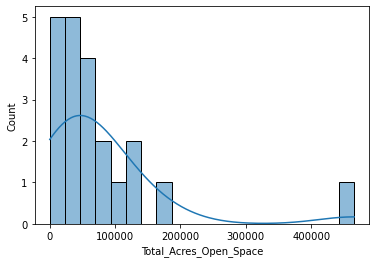

In [11]:
#Use histograms to look at the data set for issues
sns.histplot(df['Total_Acres_Open_Space'], bins=20, kde=True)

#I checked the data and Ocean County does have a significantly greater amount of open space than surrounding counties. There are two townships (Lacey Twp and Berkeley Twp) with tens of thousands of acres. A quick google map view shows that Double Trouble State Park is in both counties as well as a number of smaller preserves and parks. There is a lot of green space. 

<AxesSubplot:xlabel='Total_Num_Lots', ylabel='Count'>

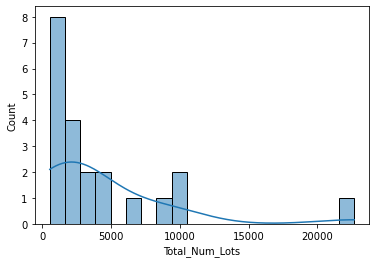

In [12]:
sns.histplot(df['Total_Num_Lots'], bins=20, kde=True)

#Ocean County also has the most lots with over 22,000 while the average is 4,297 lots in a county. 

<AxesSubplot:xlabel='Percent_Open_Space_Per_Person', ylabel='Count'>

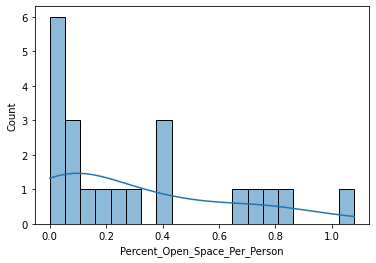

In [13]:
sns.histplot(df['Percent_Open_Space_Per_Person'], bins=20, kde=True)

#This chart shows that most counties have a low amount of open space per person. Only one county has at least an acre per person. Surprisingly its Warren county. When compared to Ocean City, it has 6x the people as Warren county. The population density makes the difference.  

In [14]:
df.dtypes

County                            object
Latitude                         float64
Longitude                        float64
Total_Acres_Open_Space           float64
Total_Num_Lots                     int64
Acres_In_County                    int64
Percent_Open_Space                object
Population_in_2020                 int64
Percent_Open_Space_Per_Person    float64
dtype: object

# Plotting a chloropleth

In [15]:
data_to_plot =df[['County','Total_Acres_Open_Space']]

In [16]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = county_geo, 
    data = data_to_plot,
    columns = ['County', 'Total_Acres_Open_Space'],
    key_on = 'properties.county',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "County").add_to(map)

folium.LayerControl().add_to(map)

In [17]:
map.save('Chloropleth_map.html')

#I wasn't able to get my Jupyter notebook to "trust" but my map did save and looks correct! 
This task helped answer the question of how much open space is in each region of New Jersey. I could probably make a few more to see how the other data is spread through the state. 

During my data cleaning and wrangling process I thought of two new questions: 
What counties should be targeted for conservation of open space? 
Which have the least open space per person? Which have the lowest overall conservation rates?
It was interesting to see that those with the most open space don't necessarily have the most open space per person. Central Jersey seems to have the most conserved open space while the most contiguous conserved open space is in Northwest NJ (which makes since since it is more farmland and mountains).
